In [23]:
from ultralytics import YOLO
import numpy as np
import os
import polars as pl
from ultralytics import settings
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from ultralytics.utils.plotting import Annotator
import rembg

# Update a setting
settings.update({'mlflow': True})

extract = YOLO("runs/detect/train6/weights/best.pt")

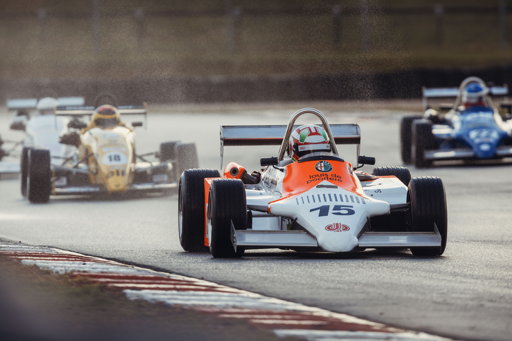


0: 448x640 1 car, 27.7ms
Speed: 2.4ms preprocess, 27.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


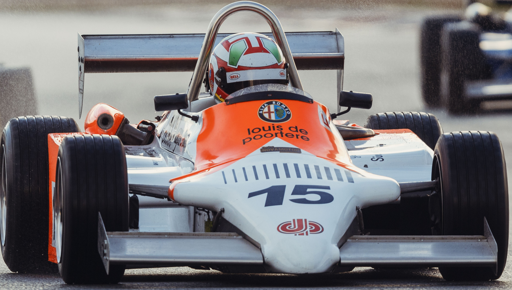

In [17]:
def display_image(img_array, size=512):
    img = Image.fromarray(img_array)
    img = img.resize((size, int(img.height // (img.width / size))))
    display(img)

def extract_cars(img, conf=0.128):
    results = extract(img, conf=conf)
    img_array = np.array(img)
    for result in results:
        for box in result.boxes:
            # Extract bounding box coordinates
            left, top, right, bottom = box.xyxy[0].int().tolist()
            yield img_array[top:bottom, left:right]
            
            
cars = []
for image_path in os.listdir("test_images/")[:1]:
    image_path = os.path.join("test_images/", image_path)
    img = Image.open(image_path)
    img_np = np.array(img)  # Convert PIL image to NumPy array
    display_image(img_np)
    for car in extract_cars(img, conf=0.5):
        cars.append(car)
        display_image(car)

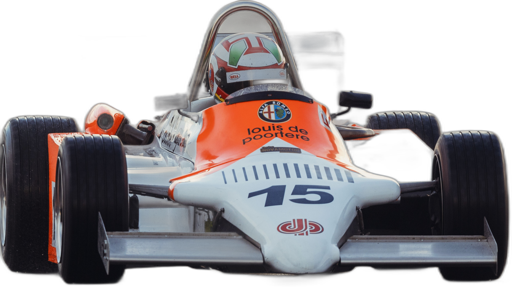

In [26]:
display_image(rembg.remove(cars[0]))